In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file ( zoo data CSV ) and check the data dimension

In [2]:
import pandas as pd
df = pd.read_csv('zoo.csv')

In [3]:
df.shape

(101, 18)

In [4]:
df.dropna(inplace=True)

In [5]:
df.head(2)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 15.0+ KB


### Q2. Drop animal_name 


In [7]:
df1 = df.drop(columns='animal_name', axis=1)
df1.head(2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


### Q3 Check distribution of target variable

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

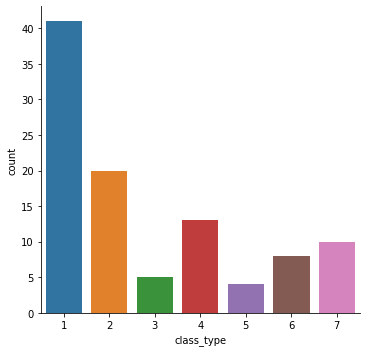

In [9]:
sns.catplot(x='class_type', kind= 'count', data=df)

### Q4. Check for missing values

In [10]:
df.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

### Q5. Import class file and understand the data

In [11]:
df_new = pd.read_csv('class.csv')
df_new.head(5)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


### Q6. Standardize the data 

In [12]:
from scipy.stats import zscore

In [13]:
df_zscore = df1.apply(zscore)
df_zscore.head(2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.57254,-1.698416,-0.384353,1.13818,-0.875451
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.57254,0.588784,-0.384353,1.13818,-0.875451


### Q7. Find out the linkage matrix

In [14]:
import scipy.cluster.hierarchy as shc
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [15]:
shc1 = shc.linkage(df_zscore.values, method='complete')
shc1

array([[  0.        ,   3.        ,   0.        ,   2.        ],
       [  1.        ,   5.        ,   0.        ,   2.        ],
       [  2.        ,   8.        ,   0.        ,   2.        ],
       [  4.        ,  10.        ,   0.        ,   2.        ],
       [ 17.        , 102.        ,   0.        ,   3.        ],
       [  6.        ,  31.        ,   0.        ,   2.        ],
       [ 34.        ,  73.        ,   0.        ,   2.        ],
       [ 82.        , 107.        ,   0.        ,   3.        ],
       [ 12.        , 103.        ,   0.        ,   3.        ],
       [ 38.        , 109.        ,   0.        ,   4.        ],
       [ 61.        , 110.        ,   0.        ,   5.        ],
       [ 18.        ,  60.        ,   0.        ,   2.        ],
       [ 92.        , 112.        ,   0.        ,   3.        ],
       [ 65.        , 106.        ,   0.        ,   3.        ],
       [ 70.        , 114.        ,   0.        ,   4.        ],
       [ 44.        , 104

### Q8. Plot the dendrogram.

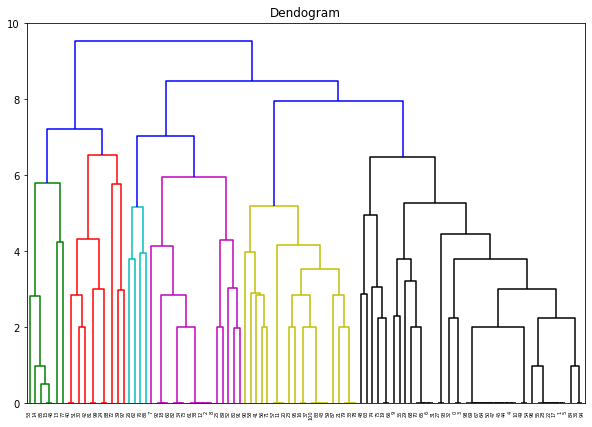

In [16]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend = shc.dendrogram(shc1)

### Q9. Recreate the dendrogram for the last 4, 7, and 12 merged clusters 

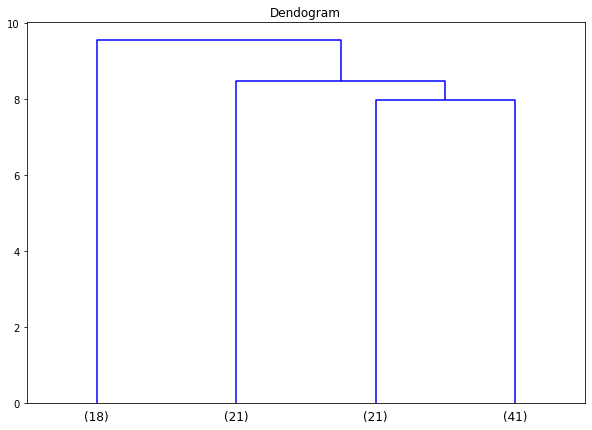

In [17]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend = shc.dendrogram(shc1, truncate_mode='lastp', p=4)

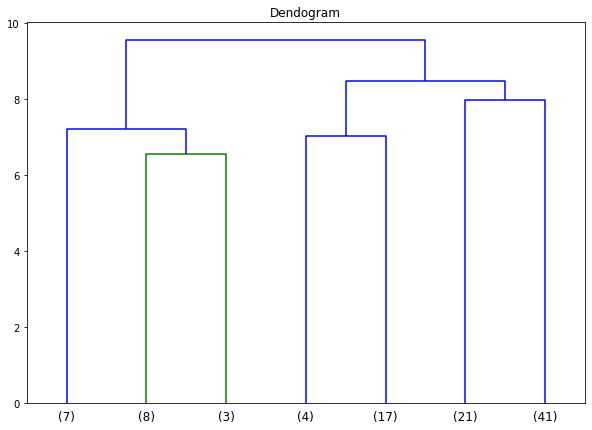

In [18]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend = shc.dendrogram(shc1, truncate_mode='lastp', p=7)

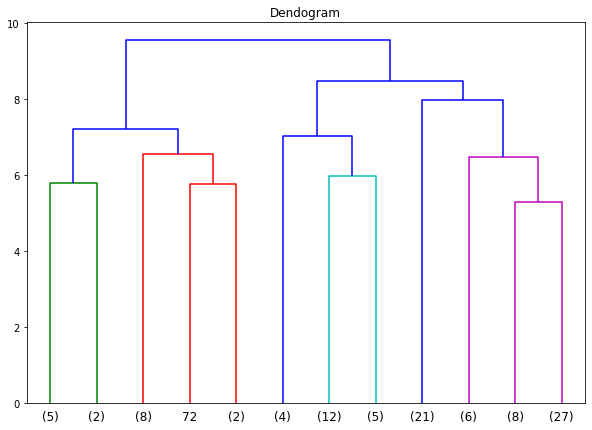

In [19]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend = shc.dendrogram(shc1, truncate_mode='lastp', p=12)

### Q10. select an optimum number of clusters and predict the cluster label for the scaled_data

In [20]:
dist = {}

In [21]:
from sklearn.cluster import KMeans
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_zscore)
    dist[k] = kmeans.inertia_

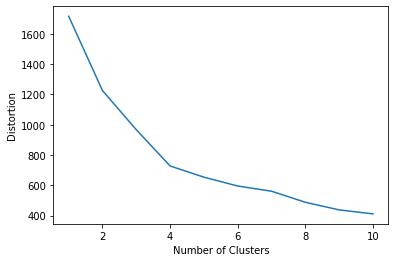

In [22]:
sns.lineplot(x = list(dist.keys()), y = list(dist.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [23]:
print ('From the Elbow plot Optimal Value of K = 4')

From the Elbow plot Optimal Value of K = 4


In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_zscore)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4)

In [26]:
df_zscore['Cluster_4'] = ac.fit_predict(df_zscore.values)

In [27]:
df_zscore['Cluster_4'].value_counts()

1    41
0    22
2    21
3    17
Name: Cluster_4, dtype: int64

In [29]:
df_zscore.head(5)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Cluster_4
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451,1
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451,1
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595,0.558396,0
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451,1
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451,1
